In [2]:
import numpy  as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse

import matplotlib.pyplot as plt
%matplotlib inline

import json
import urllib

# titanic dataset
import seaborn as sns

# 비정형 데이터 처리를 위한 라이브러리
from bs4 import BeautifulSoup
import requests
import re



print('numpy  version - ' , np.__version__)
print('pandas version - ' , pd.__version__)

numpy  version -  1.20.3
pandas version -  1.3.4


In [3]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
auto_frm = pd.read_csv('/Users/choijaewoo/visualization_data/auto-mpg.csv', header = None)

auto_frm.columns= ['mpg', 'cylinders','displacement', 'horsepower', 'weight', 'accelaration', 'model year', 'origin', 'name']
auto_frm

,mpg,cylinders,displacement,horsepower,weight,accelaration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [5]:
auto_frm = pd.read_excel('/Users/choijaewoo/visualization_data/car_mpg.xlsx', header = 0)
auto_frm.drop('Unnamed: 0', axis=1 , inplace = True)
auto_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [6]:
print('Question 1 - ')
displ_hwy = auto_frm[['displ', 'hwy']]
displ5 = displ_hwy[displ_hwy['displ'] >= 5]
answer1 =displ5['hwy'].mean()

displ4 = displ_hwy[displ_hwy['displ'] <= 5]
answer2 = displ4['hwy'].mean()

displ4 = displ_hwy[displ_hwy['displ'] <= 5]
displ4['hwy'].mean()

print('배기량에 따른 연비 비교')
print('배기량 5 - ', answer1, '배기량4 - ',answer2 )

Question 1 - 
배기량에 따른 연비 비교
배기량 5 -  18.07894736842105 배기량4 -  24.404040404040405


In [7]:
print('Question 2 - ')
audi_toyota = auto_frm[['manufacturer', 'cty']]
audi_toyota =audi_toyota.groupby('manufacturer').mean()
audi = audi_toyota.loc['audi']
toyota = audi_toyota.loc['toyota']

print('audi and toyota cty 비교')
print()
print('audi - ', audi, 'toyota - ', toyota)


Question 2 - 
audi and toyota cty 비교

audi -  cty    17.611111
Name: audi, dtype: float64 toyota -  cty    18.529412
Name: toyota, dtype: float64


In [8]:
print('Question 3 - ')
usa_japan = auto_frm[['manufacturer', 'hwy']]
usa_japan = usa_japan.groupby('manufacturer').mean()

print('chevrolet, ford, honda 자동차의 고속도로 연비 평균')

print('answer - \n', usa_japan.loc[['chevrolet', 'honda', 'ford'] ])

Question 3 - 
chevrolet, ford, honda 자동차의 고속도로 연비 평균
answer - 
                     hwy
manufacturer           
chevrolet     21.894737
honda         32.555556
ford          19.360000


In [9]:
print('Question 4 - ')
print('연료가격 변수 추가(price_fl)')
auto_frm['price_fl'] = auto_frm['fl'].replace({'c' : 2.35 , 'd' : 2.38 , 'e' :  2.11 , 'p' :  2.76, 'r' : 2.22})
auto_frm

Question 4 - 
연료가격 변수 추가(price_fl)


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,2.76
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,2.76
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,2.76
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,2.76


In [10]:
print('Qeustion 5')
print('')
model_fl = auto_frm.filter(['model', 'fl', 'price_fl'])
model_fl

Qeustion 5



,model,fl,price_fl
0,a4,p,2.76
1,a4,p,2.76
2,a4,p,2.76
3,a4,p,2.76
4,a4,p,2.76
...,...,...,...
229,passat,p,2.76
230,passat,p,2.76
231,passat,p,2.76
232,passat,p,2.76


In [11]:
print('Question 7')
print('구동방식(drv) 별 고속도로 연비(hwy)평균')
drv_hwy = auto_frm.filter(['drv', 'hwy'])
drv_hwy.groupby('drv').mean()

Question 7
구동방식(drv) 별 고속도로 연비(hwy)평균


,hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [12]:
print('Question 7')
print('임의적으로 결측값 처리를 위해서 더미 값을 넣어보도록 하자')
drv_hwy = auto_frm.filter(['drv', 'hwy'])
drv_hwy['hwy'].replace(29.0, np.NaN, inplace = True)
drv_hwy.isnull().sum()

Question 7
임의적으로 결측값 처리를 위해서 더미 값을 넣어보도록 하자


drv     0
hwy    22
dtype: int64

In [13]:
print('Question 8')
print()
drv_hwy.dropna(inplace = True)
drv_hwy.groupby('drv').mean()

Question 8



,hwy
drv,
4,19.174757
f,27.940476
r,21.000000


Question 9
구동방식별 연비평균을 비교하기 위한 막대 그래프로 시각화 해 보자


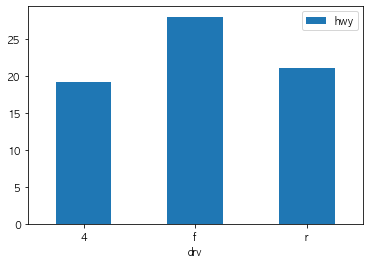

In [14]:
print('Question 9')
print('구동방식별 연비평균을 비교하기 위한 막대 그래프로 시각화 해 보자')

hwy_avg = drv_hwy.groupby('drv').mean()
hwy_avg.plot(kind='bar', rot=0)

plt.show()
plt.close()


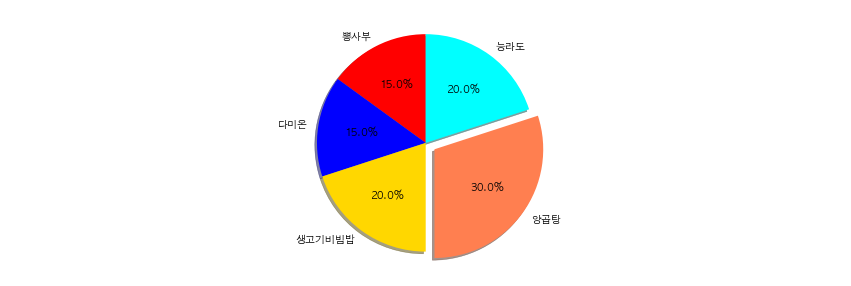

In [4]:
datas = [15, 15, 20, 30, 20]
labels = ['뽕사부','다미온','생고기비빔밥', '양곱탕', '능라도']
colors = ['red', 'blue', 'gold', 'coral', 'cyan']

plt.figure(figsize=(15,5))
plt.style.use('ggplot')
plt.axis('equal')

explode = (0,0,0,0.1,0)

plt.pie(datas, labels = labels, colors = colors, shadow = True, autopct = '%1.1f%%',
       startangle = 90, explode = explode)



plt.show()
plt.close()

In [5]:
auto_frm = pd.read_csv('/Users/choijaewoo/visualization_data/auto-mpg.csv', header = None)

auto_frm.columns= ['mpg', 'cylinders','displacement', 'horsepower', 'weight', 'accelaration', 'model year', 'origin', 'name']

auto_frm



,mpg,cylinders,displacement,horsepower,weight,accelaration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [6]:
auto_frm['cnt'] = 1
auto_frm

,mpg,cylinders,displacement,horsepower,weight,accelaration,model year,origin,name,cnt
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,1


In [7]:
print('제조국으로 그룹을 지어서 라벨인덱스 변경 - ')
print('1-> USA , 2->KOR, 3-> EU')

# auto_frm['origin'].unique()

origin_grp = auto_frm.groupby('origin').sum()
origin_grp.index=['USA', 'KOR', 'EU']
origin_grp


제조국으로 그룹을 지어서 라벨인덱스 변경 - 
1-> USA , 2->KOR, 3-> EU


,mpg,cylinders,displacement,weight,accelaration,model year,cnt
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
KOR,1952.4,291,7640.0,169631.0,1175.1,5307,70
EU,2405.6,324,8114.0,175477.0,1277.6,6118,79
